<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/CIFAR10_CNN/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout,Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
np.random.seed(123)
tf.random.set_seed(123)

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print(cifar10.load_data.__doc__)

Loads the CIFAR10 dataset.

    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |

    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train**: uint8 NumPy array of image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.

    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(50000, 1)` for the training data.

    **x_test**: uint8 NumPy array of image

In [5]:
class_name = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

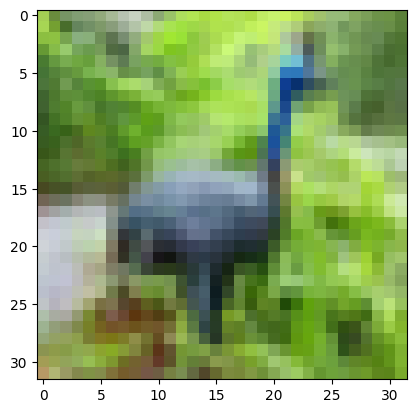

bird


In [6]:
index = 6
plt.imshow(X_train[index],cmap='gray')
plt.show()
print(class_name[y_train[index][0]])

# Modeling

Normalization

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
data_gen = ImageDataGenerator(width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              horizontal_flip = True,
                              zoom_range=0.15,
                              fill_mode = 'nearest')

In [11]:
batch_size = 100

In [12]:
X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
train_data_gen = data_gen.flow(x = X_train, y = y_train, batch_size = batch_size)

Model Architecture

In [14]:
# reg = keras.regularizers.l2(0.0001)

In [15]:
model = keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same', input_shape=(32,32,3),name = 'conv1'))
model.add(Dropout(0.15,name = 'drop1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same',name = 'conv2'))

model.add(Dropout(0.15,name = 'drop2'))
model.add(MaxPool2D(name = 'pool1'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=1, padding='same',name = 'conv3'))
model.add(Dropout(0.15,name = 'drop3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=1, padding='same',name = 'conv4'))

model.add(Dropout(0.15,name = 'drop4'))
model.add(MaxPool2D(name = 'pool2'))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', strides=1, padding='same',name = 'conv5'))
model.add(Dropout(0.15,name = 'drop5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', strides=1, padding='same',name = 'conv6'))

model.add(Dropout(0.25,name = 'drop6'))

model.add(Flatten(name='Flatten'))
model.add(Dense(units=512,activation='relu',name = 'hidden1'))
model.add(Dropout(0.5,name = 'drop7'))
model.add(Dense(units=10,activation='softmax',name = 'output'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 drop1 (Dropout)             (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 drop2 (Dropout)             (None, 32, 32, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 16, 16, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 16, 16, 64)        18496     
                                                                 
 drop3 (Dropout)             (None, 16, 16, 64)        0

In [17]:
opt = tf.optimizers.Adam(learning_rate=0.001)
metrics = tf.metrics.CategoricalAccuracy()
loss = tf.losses.CategoricalCrossentropy()

model.compile(optimizer = opt, loss = loss, metrics = metrics)

In [18]:
history = model.fit(train_data_gen, epochs = 200, validation_data=(X_val, y_val) , batch_size = batch_size, verbose = 2)

Epoch 1/200
400/400 - 30s - loss: 1.7844 - categorical_accuracy: 0.3369 - val_loss: 1.4674 - val_categorical_accuracy: 0.4777 - 30s/epoch - 76ms/step
Epoch 2/200
400/400 - 22s - loss: 1.3990 - categorical_accuracy: 0.4930 - val_loss: 1.2398 - val_categorical_accuracy: 0.5520 - 22s/epoch - 56ms/step
Epoch 3/200
400/400 - 21s - loss: 1.2132 - categorical_accuracy: 0.5645 - val_loss: 1.0543 - val_categorical_accuracy: 0.6259 - 21s/epoch - 53ms/step
Epoch 4/200
400/400 - 22s - loss: 1.0860 - categorical_accuracy: 0.6153 - val_loss: 0.9012 - val_categorical_accuracy: 0.6815 - 22s/epoch - 55ms/step
Epoch 5/200
400/400 - 22s - loss: 1.0037 - categorical_accuracy: 0.6459 - val_loss: 0.8183 - val_categorical_accuracy: 0.7063 - 22s/epoch - 55ms/step
Epoch 6/200
400/400 - 22s - loss: 0.9413 - categorical_accuracy: 0.6716 - val_loss: 0.8098 - val_categorical_accuracy: 0.7133 - 22s/epoch - 55ms/step
Epoch 7/200
400/400 - 22s - loss: 0.9021 - categorical_accuracy: 0.6842 - val_loss: 0.7340 - val_cat

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5226 - categorical_accuracy: 0.8346


[0.5226160287857056, 0.8345999717712402]

In [21]:
from sklearn.metrics import confusion_matrix ,classification_report
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)
print(confusion_matrix(y_pred, y_true))

313/313 [==============================] - 1s 3ms/step
[[858   3  33  19   7   9   2   8  47  14]
 [  8 950   0   2   0   1   0   1   9  45]
 [ 24   1 729  25  21  21   8   9   7   2]
 [  6   3  23 607  10  99  13  17   5   5]
 [ 22   2  51  68 833  49   8  42   2   0]
 [  5   0  33 104   5 721   2  15   3   0]
 [ 19   4 101 133  87  64 957  18  13   6]
 [  8   0  19  25  32  32   4 879   2   4]
 [ 25   5   7   5   3   3   3   1 893   5]
 [ 25  32   4  12   2   1   3  10  19 919]]


In [22]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.95      0.94      0.94      1016
           2       0.73      0.86      0.79       847
           3       0.61      0.77      0.68       788
           4       0.83      0.77      0.80      1077
           5       0.72      0.81      0.76       888
           6       0.96      0.68      0.80      1402
           7       0.88      0.87      0.88      1005
           8       0.89      0.94      0.92       950
           9       0.92      0.89      0.91      1027

    accuracy                           0.83     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.85      0.83      0.84     10000



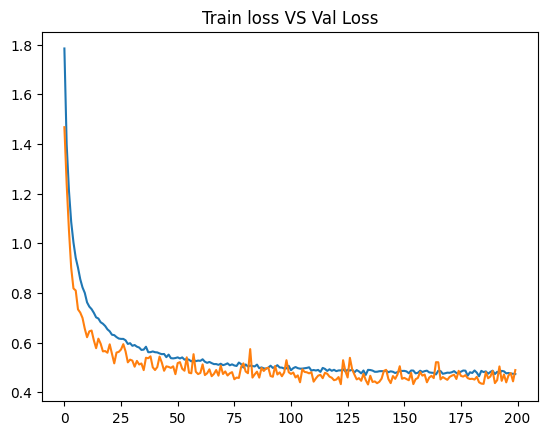

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss VS Val Loss')
plt.show()

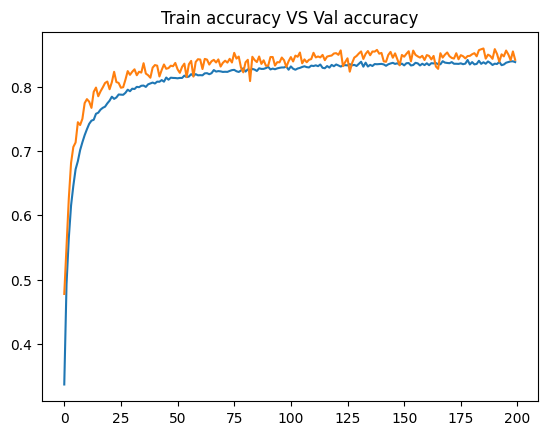

In [24]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Train accuracy VS Val accuracy')
plt.show()

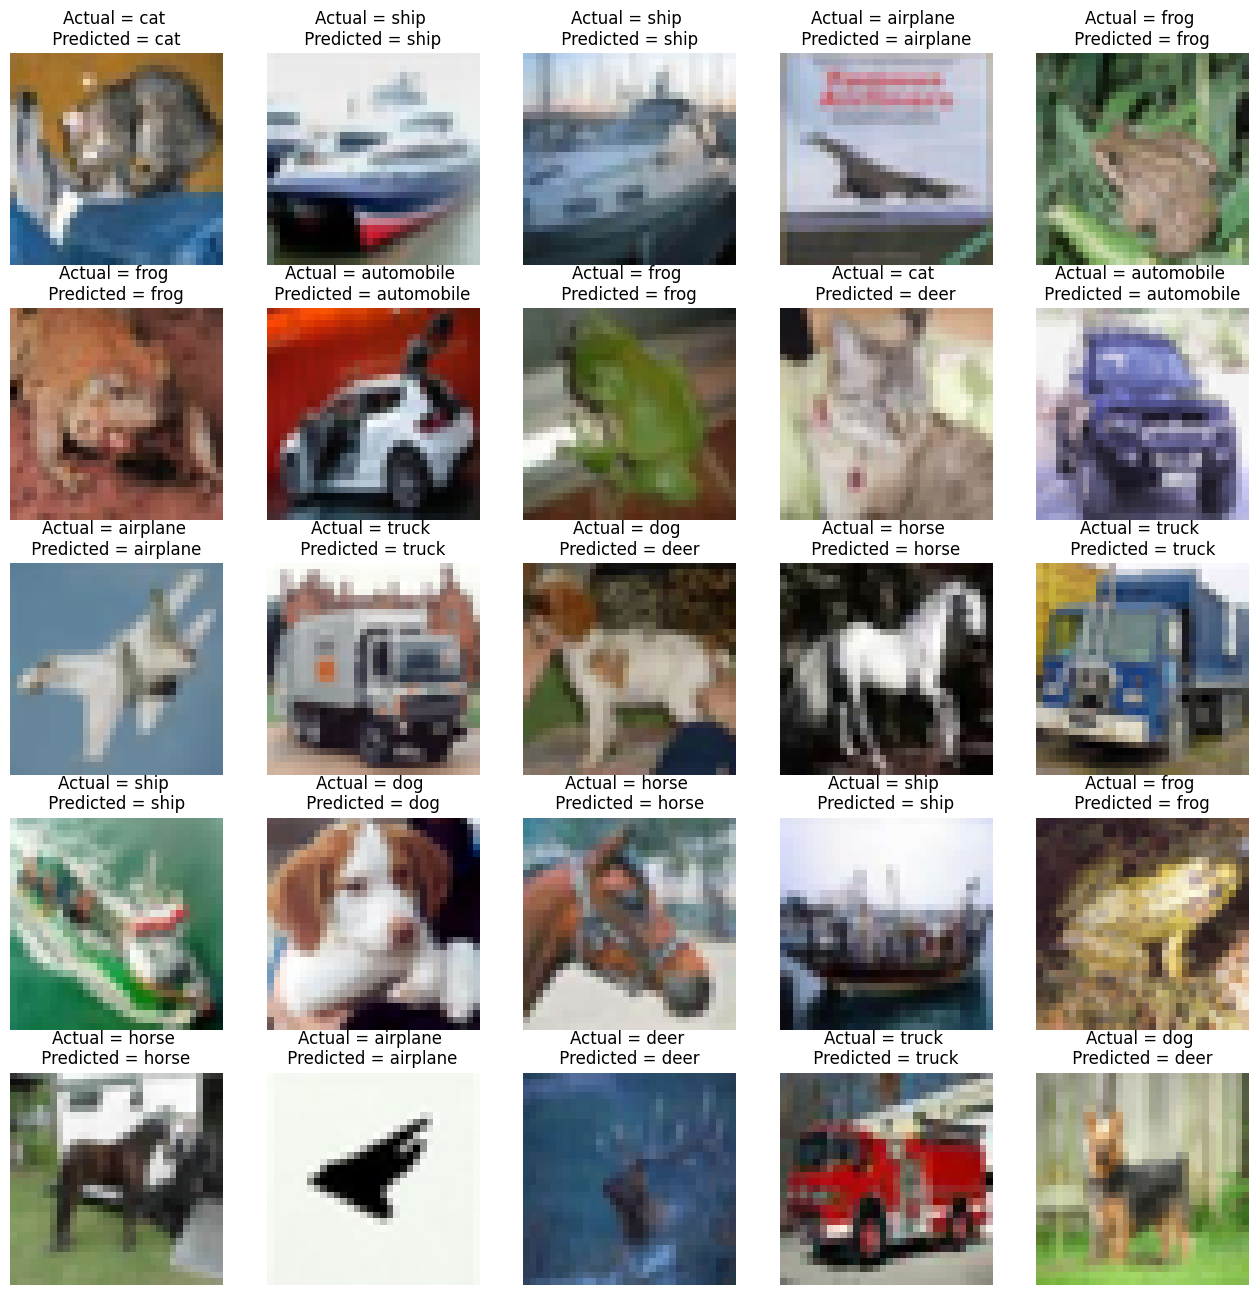

In [26]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap='Greys')
  plt.axis('off')
  plt.title("Actual = {} \n Predicted = {} ".format(class_name[y_test[i].argmax()],class_name[y_pred[i]]))